# Análise de Componentes Principais (PCA)

## Dannyel Fontenele Ribeiro – 2322130061

## Definição

- Algoritmo não-supervisionado que examina interrelações entre variáveis
- Reduz dimensionalidade (qtd. de atributos) dos dados (Extração de atributos), mantém boa parte da informação
- Converte conjunto de variáveis correlacionadas em outro de variáveis não correlacionadas
  - Componentes principais: variáveis que são combinações lineares de variáveis iniciais
  - Qtd. de informação descrescente por componentes principais (qtd. info. CP 1 > CP 2 > ...)
  - Descarte de CPs com menor informação
- Dados em espaço dimensional maior são mapeados para outro menor, e a variância dos dados no menor é máxima
  - Linhas com maior variância = maior dispersão de dados = maior informação
- Componentes principais são mais difíceis de serem interpretados
- Se a relação entre as variáveis é fraca, o PCA não reduz muito bem os dados

## Funcionamento

1. As variáveis são padronizadas (calcula-se o *z-value* de cada dado para evitar que variáveis de maior amplitude dominem)
2. Calcula-se a matriz de covariância (como variáveis variam da média em relação umas com as outras; alta correlação = informação redundante)
   - Matriz simétrica de ordem *p*, com *p* sendo o número de dimensões (Cov(a, a) = σ²(a); Cov(a, b) = Cov(b, a))
   - Se Cov(a, b) > 0 então as variáveis aumentam e diminuem juntas. Se não, quando uma aumenta, a outra diminui
3. Calcula-se os autovalores e autovetores da matriz
   - Existem *p* autovetores
   - Autovetores representam direções dos eixos com maior variância (eixos = componentes principais)
   - Autovalores representam quantidade de variância de cada CP
   - Os autovetores são ordenados com base na proporção dos seus autovalores
4. Cria-se um vetor de atributos
   - Matriz composta por todos ou os primeiros autovetores na lista, postos em coluna
5. Mapeiam-se os dados ao longo dos novos eixos
   - Dados são reorientados dos eixos antigos (*n* dimensões) para os novos (*p* dimensões)
   - Ou seja, produto entre a transposta da matriz de autovetores e a transposta da matriz de dados originais padronizados

## Como é Usado

- Redução de tempo de treino de modelos e de sobreajuste
- Filtração de ruído de dados
- Compressão de Imagens
- Extração de Componentes

## Código

Dataset: [Fifa World Cup 2022: Complete Dataset](https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset)

In [1]:
from pandas import read_csv, DataFrame

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # PCA é afetado por escala
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
data = read_csv("Fifa_world_cup_matches.csv")

data.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [3]:
for i in data.columns:
  if data[i].dtype == "object":
    print(i)

team1
team2
possession team1
possession team2
possession in contest
date
hour
category


In [4]:
# Correções
try:
  data = data.set_index(["team1", "team2"]).drop(columns=["date", "hour", "category"]).dropna()
except: pass
try: 
  data["possession team1"] = data["possession team1"].str.rstrip('%').astype("float") / 100
  data["possession team2"] = data["possession team2"].str.rstrip('%').astype("float") / 100
  data["possession in contest"] = data["possession in contest"].str.rstrip('%').astype("float") / 100
except: pass

data.head()

,,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
team1,team2,,,,,,,,,,,,,,,,,,,,,
QATAR,ECUADOR,0.42,0.50,0.08,0,2,5,6,2,0,0,...,0,1,6,5,0,0,52,72,256,279
ENGLAND,IRAN,0.72,0.19,0.09,6,2,13,8,2,6,6,...,0,1,8,13,0,0,63,72,139,416
SENEGAL,NETHERLANDS,0.44,0.45,0.11,0,2,14,9,2,0,0,...,0,0,9,15,0,0,63,73,263,251
UNITED STATES,WALES,0.51,0.39,0.10,1,1,6,7,1,1,1,...,0,1,7,7,0,0,81,72,242,292
ARGENTINA,SAUDI ARABIA,0.64,0.24,0.12,1,2,14,3,2,1,1,...,1,0,4,14,0,0,65,80,163,361


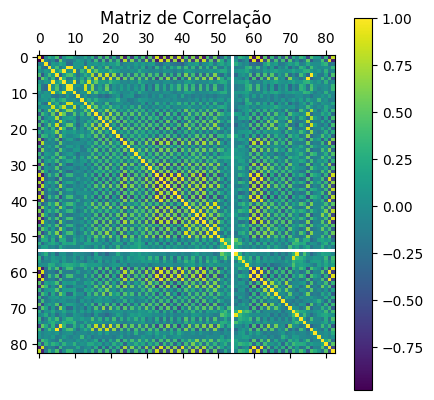

In [5]:
corr_matrix = data.corr()

plt.matshow(corr_matrix)
plt.title("Matriz de Correlação")
plt.colorbar()
plt.show()

In [6]:
data_padrao = DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

data_padrao.head()

,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,-0.222014,0.543986,-1.643741,-1.025341,0.850178,-1.244675,-0.916545,0.850178,-1.025341,-0.947034,...,-0.404520,2.333333,-0.953762,-1.284487,-0.125988,-0.125988,-1.398203,0.139663,-0.384775,-0.177695
1,2.315290,-2.062941,-1.222943,2.872985,0.850178,0.376886,-0.569451,0.850178,2.872985,2.921701,...,-0.404520,2.333333,-0.612752,0.331379,-0.125988,-0.125988,-0.627988,0.139663,-1.718664,1.528799
2,-0.052861,0.123514,-0.381348,-1.025341,0.850178,0.579581,-0.395904,0.850178,-1.025341,-0.947034,...,-0.404520,-0.333333,-0.442247,0.735345,-0.125988,-0.125988,-0.627988,0.214150,-0.304970,-0.526467
3,0.539177,-0.381053,-0.802146,-0.375620,-0.104408,-1.041980,-0.742998,-0.104408,-0.375620,-0.302245,...,-0.404520,2.333333,-0.783257,-0.880521,-0.125988,-0.125988,0.632364,0.139663,-0.544386,-0.015765
4,1.638676,-1.642469,0.039450,-0.375620,0.850178,0.579581,-1.437185,0.850178,-0.375620,-0.302245,...,2.472066,-0.333333,-1.294771,0.533362,-0.125988,-0.125988,-0.487949,0.735560,-1.445046,0.843710


In [7]:
i = min(*data_padrao.shape)

while i > 0:
  pca = PCA(n_components=i - 1, random_state=42)
  pca.fit(data_padrao)

  if pca.explained_variance_ratio_.sum() < .95:
    pca = PCA(n_components=i, random_state=42)
    break

  i -= 1

componentes = DataFrame(pca.fit_transform(data_padrao), columns=[f"Componente Principal {j}" for j in range(1, i + 1)])

componentes.head()

,Componente Principal 1,Componente Principal 2,Componente Principal 3,Componente Principal 4,Componente Principal 5,Componente Principal 6,Componente Principal 7,Componente Principal 8,Componente Principal 9,Componente Principal 10,...,Componente Principal 20,Componente Principal 21,Componente Principal 22,Componente Principal 23,Componente Principal 24,Componente Principal 25,Componente Principal 26,Componente Principal 27,Componente Principal 28,Componente Principal 29
0,-1.133065,-2.430758,-3.706197,0.276517,1.781369,1.853439,-2.964115,0.157850,0.073510,-0.622967,...,0.293322,0.900865,-0.639226,-0.056849,0.974699,1.126615,-0.710737,-0.212227,0.218872,-0.550018
1,10.475503,1.324797,0.529850,1.609347,5.171810,-2.267472,-0.239050,2.597656,-1.944235,-0.616298,...,0.617055,-0.134406,-0.296433,0.350061,-0.504336,0.248800,-0.583034,-0.453597,-1.425477,1.087031
2,-0.571731,0.810206,-0.727597,-3.218192,-1.608383,1.399818,-0.510783,-0.165272,-0.563609,-0.920986,...,0.818671,0.251441,0.240746,0.521251,-0.035076,-0.422854,-0.913711,0.381207,0.255055,-1.300289
3,2.287107,-1.297265,-1.693013,0.877581,-0.434714,0.334500,0.169942,2.131145,-0.233305,0.249360,...,0.944127,0.000840,0.676350,-1.544236,0.352889,0.419425,-1.361043,0.213726,0.726777,0.283287
4,7.771916,1.833052,-1.369380,-1.167430,-1.946526,3.729718,-2.158661,-0.116657,-2.845626,-0.696769,...,-2.075723,0.879321,-0.736755,-0.286211,0.536353,-1.171692,-0.108887,-0.378810,0.053968,-0.356016


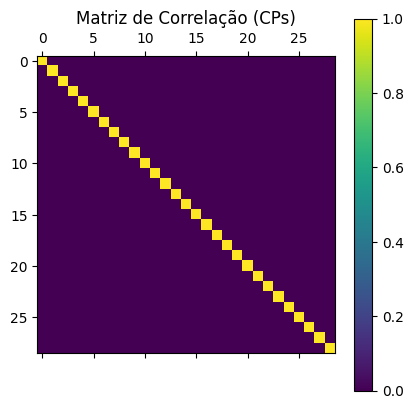

In [8]:
pca_corr_matrix = componentes.corr()

plt.matshow(pca_corr_matrix)
plt.title("Matriz de Correlação (CPs)")
plt.colorbar()
plt.show()

In [9]:
print(f"variância total explicada com {i} componentes: {pca.explained_variance_ratio_.sum():.2%}")
print(f"dados originais tinham {data.shape[0]} linhas e {data.shape[1]} colunas")
print(f"tabela de CPs tem {componentes.shape[0]} linhas e {componentes.shape[1]} colunas")

variância total explicada com 29 componentes: 95.19%
dados originais tinham 64 linhas e 83 colunas
tabela de CPs tem 64 linhas e 29 colunas


## Referências

- [Principal Component Analysis (PCA)](https://www.geeksforgeeks.org/principal-component-analysis-pca/)
- [PCA Using Python: A Tutorial](https://builtin.com/machine-learning/pca-in-python)
- [Principal Component Analysis (PCA): A Step-by-Step Explanation](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
- [What is principal component analysis (PCA)?](https://www.ibm.com/topics/principal-component-analysis)
- [Principal Component Analysis(PCA)](https://vtantravahi.medium.com/principal-component-analysis-pca-37dc2c22cdf0)
